In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Window Functions

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Hann Window

In [3]:
def hann(N):
    x = linspace(0, 2*pi, N)
    w = 0.5 * (1 - cos(x))
    return w

## Hamming Window

In [4]:
def hamming(N):
    x = linspace(0, 2*pi, N)
    w = 0.54 - 0.46 * cos(x)
    return w

## Gauss Window

In [5]:
def gauss(N, sigma=0.4):
    assert sigma <= 0.5, "The standard deviation sigma has to less or equal to 0.5"
    x = linspace(0, 2, N)
    w = exp(-0.5 * ((x - 1) / sigma)**2)
    return w

## Blackman Window

In [6]:
def blackman(N, alpha=0.16):
    x = linspace(0, 2*pi, N)
    w = 0.5 * (1 - alpha) - 0.5 * cos(x) + 0.5 * alpha * cos(2*x)
    return w

## Cosine Window

In [7]:
def cosine(N):
    x = linspace(0, pi, N)
    w = sin(x)
    return w

## Bartlett Window

In [8]:
def bartlett(N):
    x = linspace(0, N-1, N)
    h = (N - 1) / 2
    w = (h - abs(x - h)) / h
    return w

## Tukey Window

In [9]:
def tukey(N, alpha=0.5):
    x = linspace(0, N-1, N)
    a = 0.5 * alpha * (N - 1)
    b = (N - 1) * (1 - 0.5 * alpha)
    s1 = (0 <= x) & (x < a)
    s2 = (a <= x) & (x < b)
    s3 = (b <= x) & (x < N)
    r1 = lambda x: 0.5 * (1 + cos(pi * (2 * x / (alpha * (N-1)) - 1)))
    r3 = lambda x: 0.5 * (1 + cos(pi * (2 * x / (alpha * (N-1)) - 2 / alpha + 1)))
    w = np.piecewise(x, [s1, s2, s3], [r1, 1, r3])
    return w

## Rectangular Window

In [10]:
def rectangle(N):
    return ones(N)

## Visualization

In [11]:
N = 256
hann_window = hann(N)
hamming_window = hamming(N)
gauss_window = gauss(N, 0.4)
blackman_window = blackman(N, 0.16)
cosine_window = cosine(N)
bartlett_window = bartlett(N)
tukey_window = tukey(N)
rectangular_window = rectangle(N)

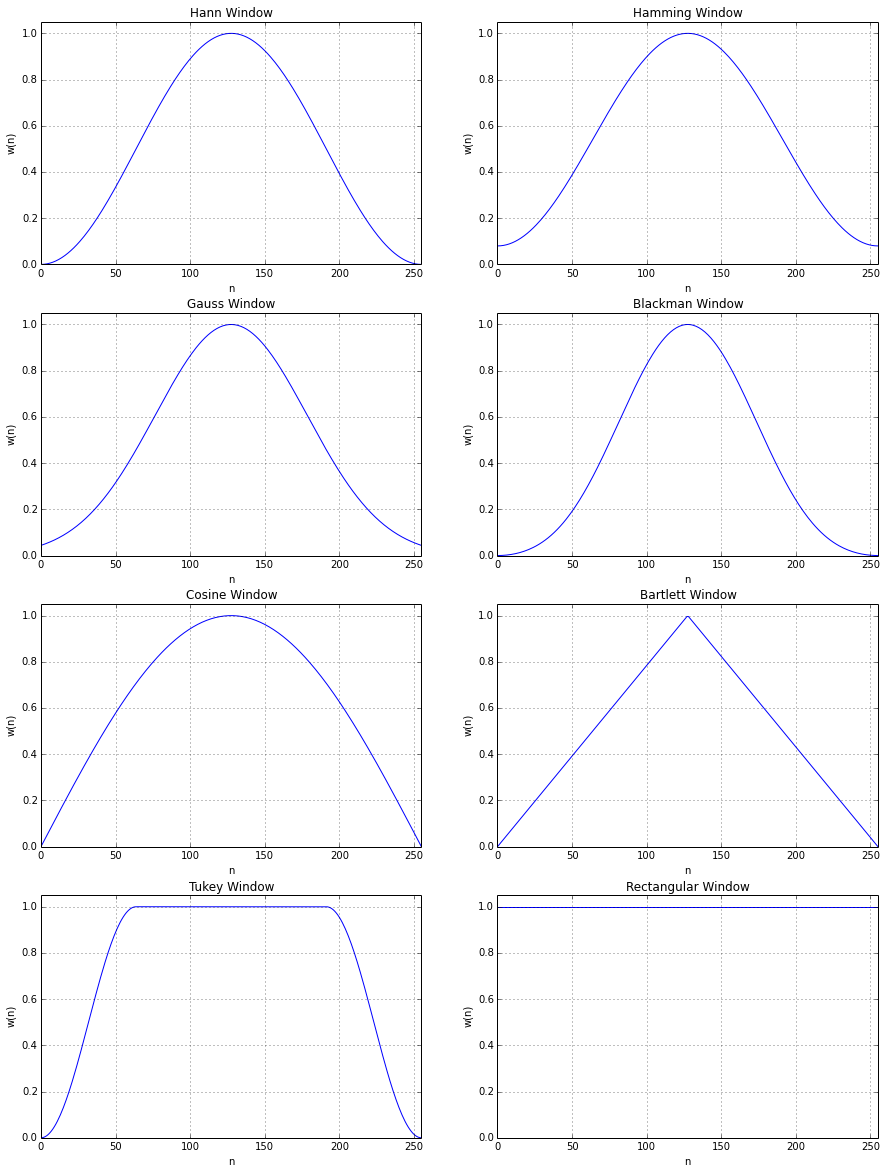

In [12]:
figure(figsize(15,20))
plt.subplot(4,2,1), plt.plot(hann_window)
plt.title("Hann Window")
plt.xlabel("n"), plt.ylabel("w(n)")
plt.xlim([0, N-1]), plt.ylim([0, 1.05]), plt.grid();

plt.subplot(4,2,2), plt.plot(hamming_window)
plt.title("Hamming Window")
plt.xlabel("n"), plt.ylabel("w(n)")
plt.xlim([0, N-1]), plt.ylim([0, 1.05]), plt.grid();

plt.subplot(4,2,3), plt.plot(gauss_window)
plt.title("Gauss Window")
plt.xlabel("n"), plt.ylabel("w(n)")
plt.xlim([0, N-1]), plt.ylim([0, 1.05]), plt.grid();

plt.subplot(4,2,4), plt.plot(blackman_window)
plt.title("Blackman Window")
plt.xlabel("n"), plt.ylabel("w(n)")
plt.xlim([0, N-1]), plt.ylim([0, 1.05]), plt.grid();

plt.subplot(4,2,5), plt.plot(cosine_window)
plt.title("Cosine Window")
plt.xlabel("n"), plt.ylabel("w(n)")
plt.xlim([0, N-1]), plt.ylim([0, 1.05]), plt.grid();

plt.subplot(4,2,6), plt.plot(bartlett_window)
plt.title("Bartlett Window")
plt.xlabel("n"), plt.ylabel("w(n)")
plt.xlim([0, N-1]), plt.ylim([0, 1.05]), plt.grid();

plt.subplot(4,2,7), plt.plot(tukey_window)
plt.title("Tukey Window")
plt.xlabel("n"), plt.ylabel("w(n)")
plt.xlim([0, N-1]), plt.ylim([0, 1.05]), plt.grid();

plt.subplot(4,2,8), plt.plot(rectangular_window)
plt.title("Rectangular Window")
plt.xlabel("n"), plt.ylabel("w(n)")
plt.xlim([0, N-1]), plt.ylim([0, 1.05]), plt.grid();

# Window Functions in 2-D

In [13]:
w = np.mat(cosine_window).T # create a column vector
w2D = w * w.T

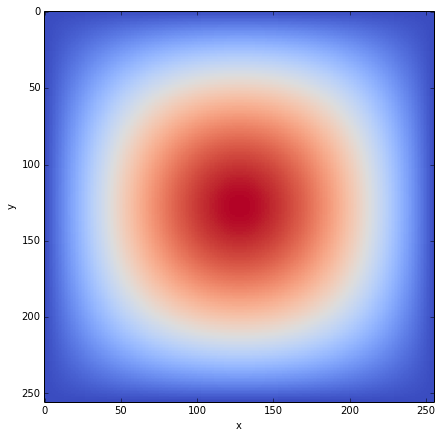

In [14]:
figure(figsize(7,7))
plt.imshow(w2D, interpolation='nearest', cmap=matplotlib.cm.coolwarm)
plt.xlabel("x")
plt.ylabel("y");